# Data Exploration

## 1. Imports

In [13]:
import pandas as pd
import nltk

from symbolic.helpers.dict_data import DictData
from symbolic.preprocessing.tokenize_text import tokenize_text
from symbolic.preprocessing.remove_stop_words import remove_stop_words
from symbolic.preprocessing.stemming import stemming_words

In [14]:
df = pd.read_csv('../../../datasets/movie_reviews_with_language.csv')
df

,movie_title,username,numeric_rating,likes,language,comment
0,2001: A Space Odyssey,qaaio,2.5,0,ar,ياساتر اقسم بالله اغبى شي تابعته واكثر شي تمطي...
1,2001: A Space Odyssey,ditapie,5.0,0,en,This is the greatest film ever made. I can’t f...
2,2001: A Space Odyssey,uchinagas,5.0,0,pt,como pode esse filme existir
3,2001: A Space Odyssey,laurkarasek,1.5,0,en,Incredibly beautiful movie - especially for th...
4,2001: A Space Odyssey,nickcaven,5.0,0,en,This movie is a slow burn masterpiece. Each sc...
...,...,...,...,...,...,...
3055,2001: A Space Odyssey,silly_pssy,5.0,1,en,shapes and colors and … well… space baby of co...
3056,2001: A Space Odyssey,pateajubiladas,5.0,0,es,La mejor película espacial en mi opinión. El f...
3057,2001: A Space Odyssey,sidracheema,3.0,2,en,Glad I watched this as Kubrick intended. Over...
3058,2001: A Space Odyssey,ciaranh123,5.0,0,en,Naruto Smith what are you doing here?


## 2. Exploration

In [15]:
desired_lang = 'pt'
desired_columns = ['movie_title', 'numeric_rating', 'likes', 'comment']

df_filtered = df[df['language'] == desired_lang][desired_columns]
df_filtered

,movie_title,numeric_rating,likes,comment
2,2001: A Space Odyssey,5.0,0,como pode esse filme existir
12,2001: A Space Odyssey,4.0,1,"Da evolução humana,as viagens espacias, relaçã..."
29,2001: A Space Odyssey,5.0,0,"Não entendi, mas fodastico mds"
42,2001: A Space Odyssey,5.0,0,O Stanley Kubrick gastou todas as barrinhas ne...
45,2001: A Space Odyssey,5.0,0,Esse filme é pra ver depois de ficar bem doido...
...,...,...,...,...
3023,2001: A Space Odyssey,5.0,0,"Sendo sincero, não sei se sou capaz de descrev..."
3025,2001: A Space Odyssey,5.0,0,"""This mission is too important for me to allow..."
3044,2001: A Space Odyssey,4.5,0,Visualmente impecável. Muitos filmes de cgi at...
3051,2001: A Space Odyssey,4.5,0,laerte eu não sei se entendi mas falaram que e...


In [16]:
comment_example = df_filtered.iloc[3:4,:]["comment"]
comment_example.item()

'O Stanley Kubrick gastou todas as barrinhas nesse filme. Eu não acompanhei muito a carreira da Kubrick, provável dele ser assim a vida toda mas porra, como que pode? O filme é lindo, tudo nesse filme é impecável, da estética ao texto, tudo no seu devido lugar, Absolute cinema. 5/5'

## 3. Tokenization

In [17]:
comented_tokenized = tokenize_text(comment_example.item())
comented_tokenized

['O',
 'Stanley',
 'Kubrick',
 'gastou',
 'todas',
 'as',
 'barrinhas',
 'nesse',
 'filme',
 '.',
 'Eu',
 'não',
 'acompanhei',
 'muito',
 'a',
 'carreira',
 'da',
 'Kubrick',
 ',',
 'provável',
 'dele',
 'ser',
 'assim',
 'a',
 'vida',
 'toda',
 'mas',
 'porra',
 ',',
 'como',
 'que',
 'pode',
 '?',
 'O',
 'filme',
 'é',
 'lindo',
 ',',
 'tudo',
 'nesse',
 'filme',
 'é',
 'impecável',
 ',',
 'da',
 'estética',
 'ao',
 'texto',
 ',',
 'tudo',
 'no',
 'seu',
 'devido',
 'lugar',
 ',',
 'Absolute',
 'cinema',
 '.',
 '5/5']

## 4. Removing stop words

In [27]:
from nltk.corpus import stopwords
stops = set(stopwords.words('portuguese'))

print(f'The stopwords amount is {len(stops)}')
print(f'Some stop words defined by the lib are:')
list(stops)[:10]

The stopwords amount is 207
Some stop words defined by the lib are:


['elas',
 'seriam',
 'houverei',
 'mesmo',
 'havemos',
 'fôramos',
 'já',
 'lhe',
 'meu',
 'tenham']

In [19]:
manual_detected_stop_words = {'o', 'a', 'os', 'as', 'um', 'uma', 'uns', 'umas', 'de', 'do', 'da', 'e', 'que', 'eu', 'tu', 'ele', 'ela', 'eles', 'vós', 'nós', 'você', 'vocês', 'me', 'te', 'lhe', 'nos', 'vos', 'lhes', 'mim', 'ti', 'si'}

print(f'The manual stop words amount is {len(manual_detected_stop_words)}')

The manual stop words amount is 31


In [ ]:
all_stopwords = set(stops) | set(manual_detected_stop_words)

print(f'The final stop words amount is {len(all_stopwords)}')

print(f'Some stop words are:')
list(all_stopwords)[:10]

The final stop words amount is 213
Some stpop words are:


['elas',
 'seriam',
 'houverei',
 'mesmo',
 'havemos',
 'fôramos',
 'já',
 'lhe',
 'meu',
 'tenham']

In [21]:
comment_without_stop_words = remove_stop_words(comented_tokenized)
print(f'The size of the comment with stop words is {len(comented_tokenized)}')
print(f'The size of the comment without stop words is {len(comment_without_stop_words)}\n')
print(f'Some words of the comment without stop words are:')
comment_without_stop_words[:10]

The size of the comment with stop words is 59
The size of the comment without stop words is 224

Some words of the comment without stop words are:


'Stanley Ku'

## 5. Reading portuguese dictionary

In [22]:
dict_data = DictData()
category_df = dict_data.get_category_df()
category_df

,category_id,category_name
0,1,function
1,2,pronoun
2,3,ppron
3,4,i
4,5,we
...,...,...
68,121,swear
69,122,netspeak
70,123,assent
71,124,nonflu


In [23]:
entry_df = dict_data.get_entries_df()
entry_df

,word,is_wildcard,category_ids
0,(:,False,"[30, 31, 120, 122]"
1,):,False,"[30, 32, 120, 122]"
2,:(,False,"[30, 32, 120, 122]"
3,:'(,False,"[30, 32, 35, 120, 122]"
4,:-(,False,"[30, 32, 120, 122]"
...,...,...,...
14454,zueir,True,"[120, 122]"
14455,zuer,True,"[120, 122]"
14456,zuêr,True,"[120, 122]"
14457,zumbi,False,[115]


## 6. Stemming (Derivation)

In [34]:
from symbolic.helpers.flatten import flatten_extend


ps = nltk.PorterStemmer()

comment_steammed = stemming_words(words=comment_without_stop_words, porter_steamer=ps, entry_df=entry_df)
comment_steammed_flatten = flatten_extend(comment_steammed)
print(f'Start of the commented stemmed: {comment_steammed[:10]}')
print(f'Start of the commented flatten: {comment_steammed_flatten[:10]}')

Start of the commented stemmed: [[120, 124], [120, 122], [1, 2, 3, 7, 9, 10, 11], [120, 124], [120, 122, 124], [110], [1, 14], [120, 122, 124], [70, 74, 111], [120, 124]]
Start of the commented flatten: [120, 124, 120, 122, 1, 2, 3, 7, 9, 10]


## 7. Detecting emotion

In [32]:
category_df[category_df["category_id"].isin([31,32])]

,category_id,category_name
22,31,posemo
23,32,negemo


In [33]:
def map_category_ids_to_names(category_ids, category_df):
    id_to_name = dict(zip(category_df["category_id"], category_df["category_name"]))
    return [id_to_name.get(cid, f"Unknown({cid})") for cid in category_ids]

In [38]:
categories_for_comment = map_category_ids_to_names(comment_steammed_flatten, category_df)
print(f'Some categories for the comment are:')
categories_for_comment[:10]

Some categories for the comment are:


['informal',
 'nonflu',
 'informal',
 'netspeak',
 'function',
 'pronoun',
 'ppron',
 'shehe',
 'ipron',
 'article']

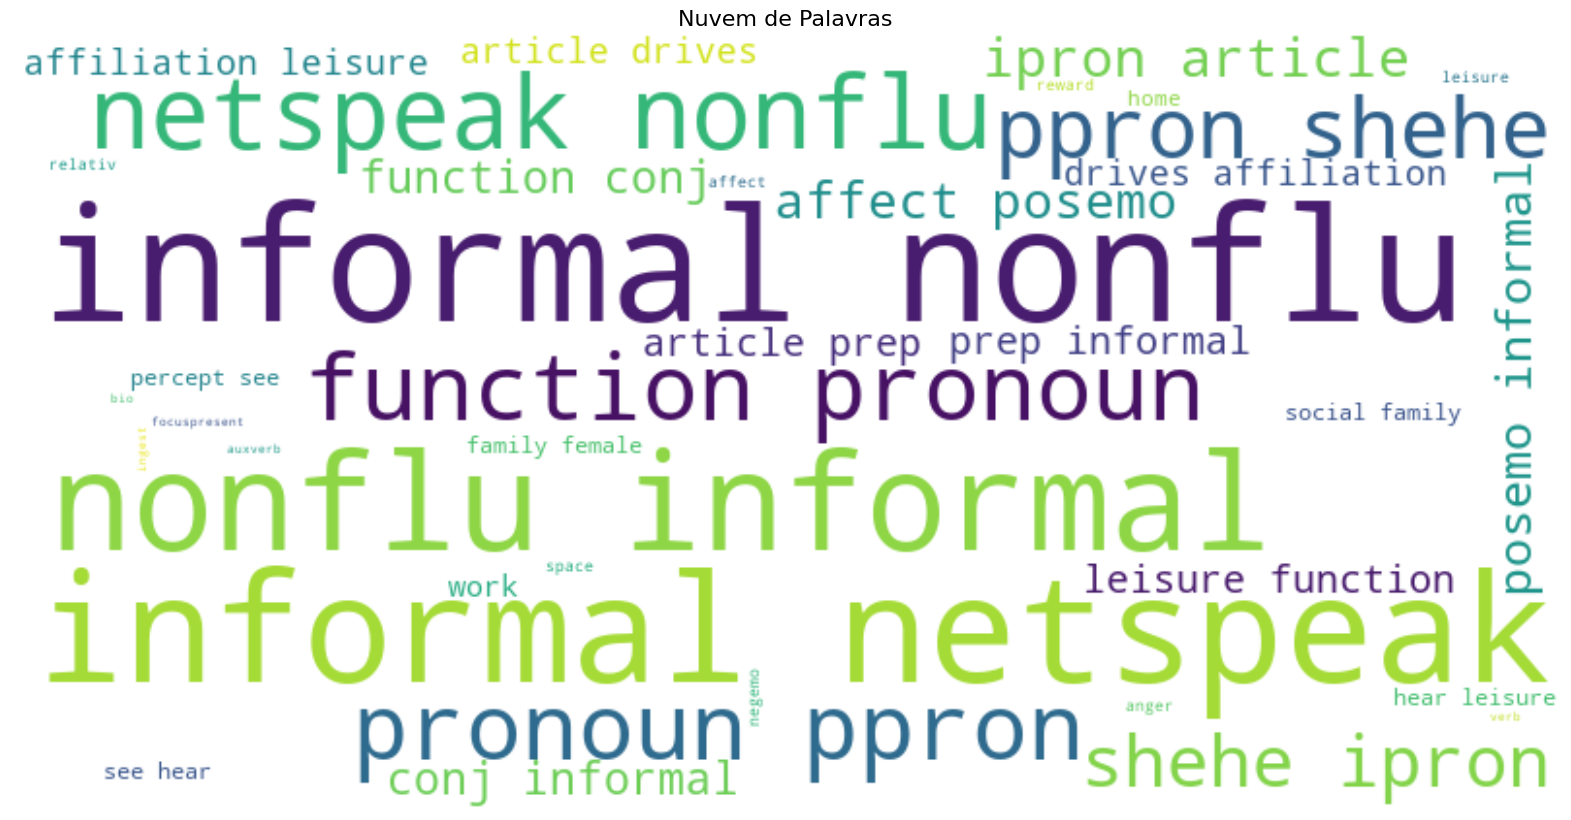

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(categories_for_comment))

plt.figure(figsize=(25, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras', fontsize=16)
plt.tight_layout(pad=0)
plt.show()

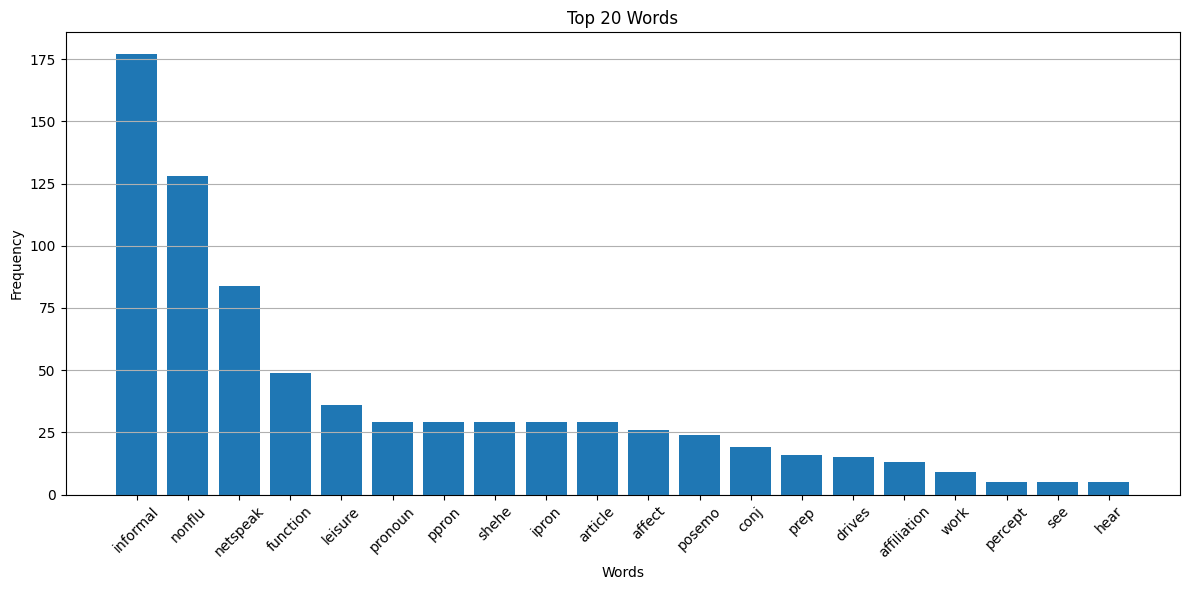

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

word_counts = Counter(categories_for_comment)

top_n = 20
most_common = word_counts.most_common(top_n)

words, counts = zip(*most_common)

plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.title(f'Top {top_n} Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()